# Relevant code for the projects

The following snippets of code perform some of the basic operations required for the projects.

Feel free to modify them, or to use alternative solutions, when you include them in your exercise.

In [1]:
# Loading some relevant librarires
# Note: the installation of the libraries follows the same instruction as the radar exercise
import csv
import datetime
import scipy
import numpy as np
import netCDF4 as nc
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from collections import OrderedDict
import pandas as pd
import os
import pickle 
import re

In [2]:
locations = ['oceanie', 'southamerica', 'tropicpacifics', 'tropicsouthafrica', 'tropicsouthamerica']
model = ['ssp2', 'ssp5']
directory = 'data_climate_modeling'
chosen_var_name = ['rh2m', 'q2m','tsol_ter'] #Loading the needed variables: Relative Humidity, Specific humidity, Temperature 

In [3]:
#Data extraction and pickling
def loading_datas_to_pickle(directory):
    v = {}
    v100 = {}
    for foldername in os.listdir(directory):
        if foldername == '.ipynb_checkpoints':
            continue 
        fold = os.path.join(directory, foldername)
        count = 1
        print(foldername)
        for filename in sorted(os.scandir(fold), key=lambda e: e.name): 
            if filename.is_file():
                #print('\n', filename.path)
                with nc.Dataset(filename.path, 'r') as input_netcdf_f:
                    chosen_var_content = input_netcdf_f[chosen_var_name[0]]
                    #print('\nInfo about %s:\n' % chosen_var_name, chosen_var_content)

                    variable_time = input_netcdf_f.variables['time_counter']
                    variable_lat = input_netcdf_f.variables['lat']
                    variable_lon = input_netcdf_f.variables['lon']

                    #print('\nInfo about time (as variable):\n', variable_time)
                    re.search('^data_([a-zA-Z]+)_(ssp[0-9]+)_[0-9]+$', foldername)

                    specifics = re.search('^data_([a-z]+)_(ssp[0-9]+)_[0-9]+$', foldername)

                    v["time_array_" + specifics.groups()[0] + '_'
                      + specifics.groups()[1] + '_'+ str(count)] = np.array(variable_time)
                    v["lat_array_" + specifics.groups()[0] + '_'
                      + specifics.groups()[1] + '_'+ str(count)] = np.array(variable_lat)
                    v["lon_array_" + specifics.groups()[0] + '_'
                      + specifics.groups()[1] + '_'+ str(count)] = np.array(variable_lon)

                    v[chosen_var_name[0] + "_array_" + specifics.groups()[0] + '_'
                      + specifics.groups()[1] + '_'+ str(count)] = np.array(input_netcdf_f[chosen_var_name[0]])

                    v[chosen_var_name[1] + "_array_" + specifics.groups()[0] + '_'
                      + specifics.groups()[1] + '_'+ str(count)] = np.array(input_netcdf_f[chosen_var_name[1]])
                    
                    v[chosen_var_name[2] + "_array_" + specifics.groups()[0] + '_'
                      + specifics.groups()[1] + '_'+ str(count)] = np.array(input_netcdf_f[chosen_var_name[2]])


                    count += 1

        reference_start_date = datetime.datetime(2015, 1, 1, 0, 0) # <- the reference start date of 2015-01-01
        time_array_oceanie_ssp2_100 = np.array(['time_array_oceanie_ssp2_1'])

        v100[chosen_var_name[0]+ '_array_' + specifics.groups()[0] + '_' + 
          specifics.groups()[1] +'_' + str(100)] = np.array(v['rh2m_array_%s_%s_1' % (specifics.groups()[0], specifics.groups()[1])])
        v100[chosen_var_name[1]+ '_array_' + specifics.groups()[0] + '_' + 
          specifics.groups()[1] +'_' + str(100)] = np.array(v['q2m_array_%s_%s_1' % (specifics.groups()[0], specifics.groups()[1])])
        v100[chosen_var_name[2]+ '_array_' + specifics.groups()[0] + '_' + 
          specifics.groups()[1] +'_' + str(100)] = np.array(v['tsol_ter_array_%s_%s_1' % (specifics.groups()[0], specifics.groups()[1])])

        v100['time_array_%s_%s_100'% (specifics.groups()[0], specifics.groups()[1])] = np.array(v['time_array_%s_%s_1' % (specifics.groups()[0], specifics.groups()[1])])

        for i in range(2, count):
            v100[chosen_var_name[0]+ '_array_' + specifics.groups()[0] + '_' + 
                specifics.groups()[1] +'_' + str(100)] = np.concatenate((v100[chosen_var_name[0]+ '_array_' + 
                specifics.groups()[0] + '_' +  specifics.groups()[1] +'_' + str(100)], v['rh2m_array_%s_%s_%d' %(specifics.groups()[0], specifics.groups()[1], i)]))
            v100[chosen_var_name[1]+ '_array_' + specifics.groups()[0] + '_' + 
                specifics.groups()[1] +'_' + str(100)] = np.concatenate((v100[chosen_var_name[1]+ '_array_' +
                specifics.groups()[0] + '_' +  specifics.groups()[1] +'_' + str(100)], v['q2m_array_%s_%s_%d' %(specifics.groups()[0], specifics.groups()[1], i)]))
            v100[chosen_var_name[2]+ '_array_' + specifics.groups()[0] + '_' + 
                specifics.groups()[1] +'_' + str(100)] = np.concatenate((v100[chosen_var_name[2]+ '_array_' +
                specifics.groups()[0] + '_' +  specifics.groups()[1] +'_' + str(100)], v['tsol_ter_array_%s_%s_%d' %(specifics.groups()[0], specifics.groups()[1], i)]))
            v100['time_array_%s_%s_100'% (specifics.groups()[0], specifics.groups()[1])] =  np.append(v100['time_array_%s_%s_100'% (specifics.groups()[0], specifics.groups()[1])], v['time_array_%s_%s_%d'%(specifics.groups()[0], specifics.groups()[1], i)])
        v100['time_array_%s_%s_100'% (specifics.groups()[0], specifics.groups()[1])] = [reference_start_date + datetime.timedelta(seconds=int(t)) for t in v100['time_array_%s_%s_100'% (specifics.groups()[0], specifics.groups()[1])]]
    #print("Values contained in V:\n", v.keys())
    print("\nValues contained in v100 (V_concatenated):\n", v100.keys())
    
    return v, v100 
    
#v, v100 = loading_datas_to_pickle(directory)    
    

In [4]:
with open('dico_v_south.pickle', 'rb') as handle:
    v = pickle.load(handle)
with open('dico_v100_south.pickle', 'rb') as handle:
    v100 = pickle.load(handle)

In [5]:
v100.keys()

dict_keys(['rh2m_array_southamerica_ssp2_100', 'q2m_array_southamerica_ssp2_100', 'tsol_ter_array_southamerica_ssp2_100', 'time_array_southamerica_ssp2_100', 'rh2m_array_oceanie_ssp5_100', 'q2m_array_oceanie_ssp5_100', 'tsol_ter_array_oceanie_ssp5_100', 'time_array_oceanie_ssp5_100', 'rh2m_array_tropicsouthamerica_ssp2_100', 'q2m_array_tropicsouthamerica_ssp2_100', 'tsol_ter_array_tropicsouthamerica_ssp2_100', 'time_array_tropicsouthamerica_ssp2_100', 'rh2m_array_tropicsouthamerica_ssp5_100', 'q2m_array_tropicsouthamerica_ssp5_100', 'tsol_ter_array_tropicsouthamerica_ssp5_100', 'time_array_tropicsouthamerica_ssp5_100', 'rh2m_array_tropicsouthafrica_ssp5_100', 'q2m_array_tropicsouthafrica_ssp5_100', 'tsol_ter_array_tropicsouthafrica_ssp5_100', 'time_array_tropicsouthafrica_ssp5_100', 'rh2m_array_tropicsouthafrica_ssp2_100', 'q2m_array_tropicsouthafrica_ssp2_100', 'tsol_ter_array_tropicsouthafrica_ssp2_100', 'time_array_tropicsouthafrica_ssp2_100', 'rh2m_array_southamerica_ssp5_100', 'q2

In [6]:
#Size Check. SSP5 models smaller than SSP2
for loc in locations:
    for mod in model: 
        print(len(v100['time_array_%s_%s_100' % (loc, mod)]))

1032
960
1032
960
1032
960
1032
960
1032
960


In [7]:
for loc in locations: 
    for mod in model: 
        print(loc, mod)
        #print(v100['rh2m_array_%s_%s_100' % (loc, mod)].shape)
        #print(np.isnan(v100['rh2m_array_%s_%s_100' % (loc, mod)]).sum()) No NaN in dataset
        print(v100['rh2m_array_%s_%s_100' % (loc, mod)].mean(axis = (0,1,2)))
        print(v100['rh2m_array_%s_%s_100' % (loc, mod)].std(axis = (0,1,2)))
        

oceanie ssp2
73.60413
13.740621
oceanie ssp5
73.70375
13.884912
southamerica ssp2
76.24787
13.931186
southamerica ssp5
75.67491
14.277009
tropicpacifics ssp2
79.59489
4.4943876
tropicpacifics ssp5
79.8292
4.599204
tropicsouthafrica ssp2
68.57036
19.259222
tropicsouthafrica ssp5
68.05573
19.275398
tropicsouthamerica ssp2
75.79696
12.962902
tropicsouthamerica ssp5
74.99805
13.427153


/usr/local/lib/python3.8/dist-packages/cartopy/mpl/gridliner.py:336: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/usr/local/lib/python3.8/dist-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/usr/local/lib/python3.8/dist-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


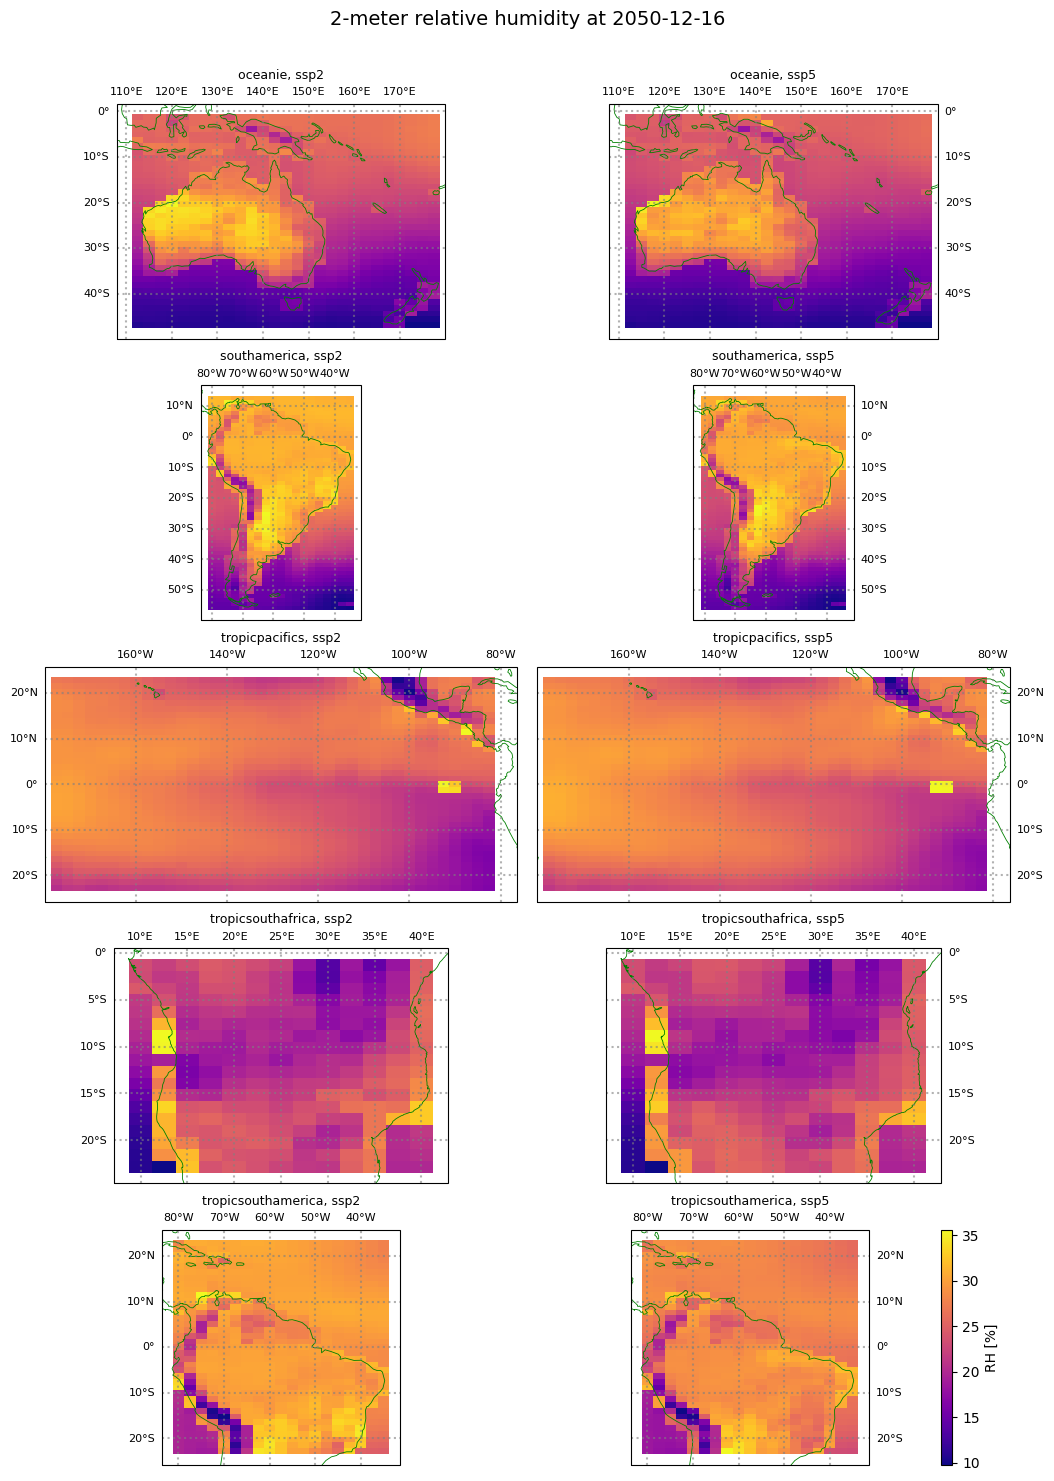

In [8]:
fig, ax = plt.subplots(nrows= len(locations), ncols=2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize = (10,15))
cmap = 'plasma'

#chosen_time = np.array([12,2020])
chosen_time = "12-2050"  #Enter a date. Format = '%m-%Y'"
##chosen_time_index = (chosen_time[1] - 2015)*12 + chosen_time[0] - 1
chosen_time_index = (int(chosen_time.split('-')[1]) -2015)*12 + int(chosen_time.split('-')[0]) -1
fig.suptitle('2-meter relative humidity at %s' % v100['time_array_oceanie_ssp2_100'][chosen_time_index].strftime('%Y-%m-%d'), fontsize=14)
fig.tight_layout(rect = [0,0,1,.95], h_pad = 5)
for i, loc in enumerate(locations): 
    for j, mod in enumerate(model):
        chosen_time_index
        lon_array = np.array(v['lon_array_%s_%s_1' % (loc, mod)])
        lat_array = np.array(v['lat_array_%s_%s_1' % (loc, mod)])
        mappable = ax[i,j].pcolormesh(lon_array, lat_array, v100['tsol_ter_array_%s_%s_100'% (loc, mod)][chosen_time_index]-273.3, cmap = cmap)
        
        ax[i,j].set_xlabel('Longitude [°]')
        ax[i,j].set_ylabel('Latitude [°]')
        ax[i,j].set_title('%s, %s' %(loc, mod), fontsize = 9)
        ax[i,j].coastlines(color='green', linewidth=0.6)
        
        gl = ax[i,j].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle=':', linewidth=1.5, color='gray', alpha=0.6)
        gl.xlabel_style = {'size':8} 
        gl.ylabel_style = {'size':8}
        gl.xlabels_bottom = False 
        if (j+1)%2 == 0:
            gl.ylabels_left = False 
        else:
            gl.ylabels_right = False 
            
fig.colorbar(mappable=mappable, label='RH [%]', pad = .15)
fig.show()

pass
        

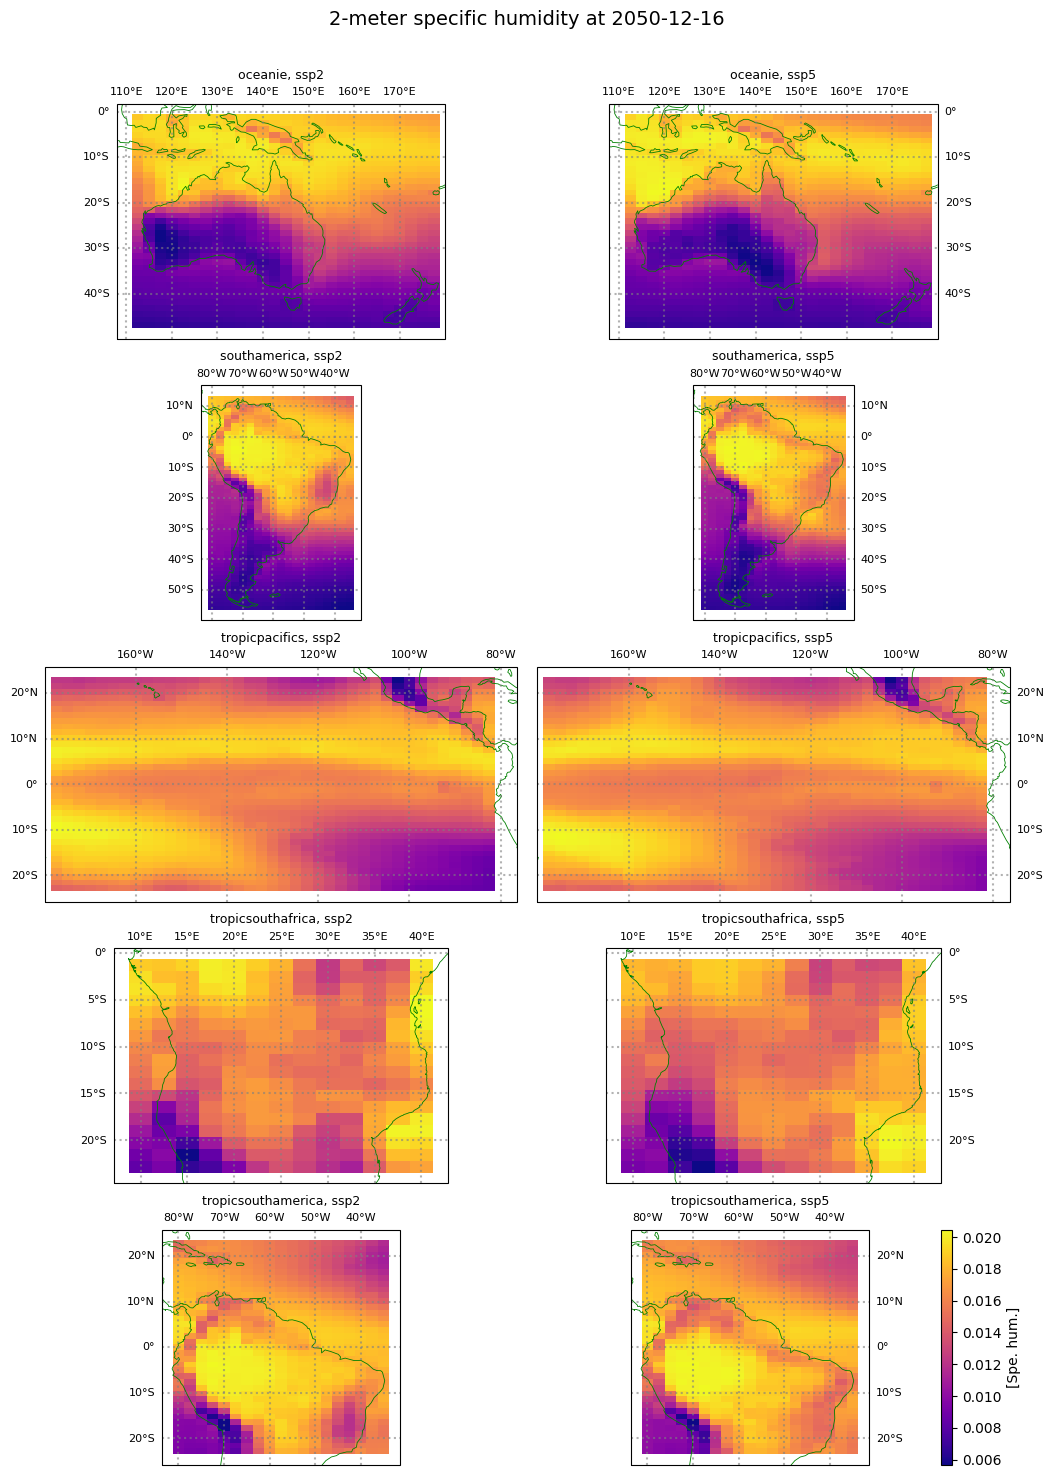

In [9]:
fig, ax = plt.subplots(nrows= len(locations), ncols=2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize = (10,15))
cmap = 'plasma'

#chosen_time = np.array([12,2020])
chosen_time = "12-2050"  #Enter a date. Format = '%m-%Y'"
##chosen_time_index = (chosen_time[1] - 2015)*12 + chosen_time[0] - 1
chosen_time_index = (int(chosen_time.split('-')[1]) -2015)*12 + int(chosen_time.split('-')[0]) -1
fig.suptitle('2-meter specific humidity at %s' % v100['time_array_oceanie_ssp2_100'][chosen_time_index].strftime('%Y-%m-%d'), fontsize=14)
fig.tight_layout(rect = [0,0,1,.95], h_pad = 5)
for i, loc in enumerate(locations): 
    for j, mod in enumerate(model):
        chosen_time_index
        lon_array = np.array(v['lon_array_%s_%s_1' % (loc, mod)])
        lat_array = np.array(v['lat_array_%s_%s_1' % (loc, mod)])
        mappable = ax[i,j].pcolormesh(lon_array, lat_array, v100['q2m_array_%s_%s_100'% (loc, mod)][chosen_time_index], cmap = cmap)
        
        ax[i,j].set_xlabel('Longitude [°]')
        ax[i,j].set_ylabel('Latitude [°]')
        ax[i,j].set_title('%s, %s' %(loc, mod), fontsize = 9)
        ax[i,j].coastlines(color='green', linewidth=0.6)
        
        gl = ax[i,j].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle=':', linewidth=1.5, color='gray', alpha=0.6)
        gl.xlabel_style = {'size':8} 
        gl.ylabel_style = {'size':8}
        gl.xlabels_bottom = False 
        if (j+1)%2 == 0:
            gl.ylabels_left = False 
        else:
            gl.ylabels_right = False 
            
fig.colorbar(mappable=mappable, label='[Spe. hum.]', pad = .15)
fig.show()

        
pass

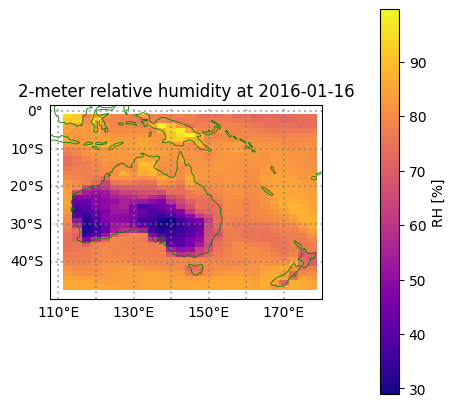

In [10]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())

lon_array = np.array(v['lon_array_oceanie_ssp2_1'])
lat_array = np.array(v['lat_array_oceanie_ssp2_1'])
cmap = 'plasma'

mappable = ax.pcolormesh(lon_array, lat_array, v100['rh2m_array_oceanie_ssp2_100'][12], cmap = cmap) # <- we added a ".T" to the relative_hum array to transpose it, since we want the longitude on the x-axis

ax.set_xlabel('Longitude [°]')
ax.set_ylabel('Latitude [°]')
ax.set_title('2-meter relative humidity at %s' % v100['time_array_oceanie_ssp2_100'][12].strftime('%Y-%m-%d'))
ax.coastlines(color='green', linewidth=0.6)

gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle=':', linewidth=1.5, color='gray', alpha=0.6)
gl.top_labels = False
gl.right_labels = False
plt.colorbar(mappable=mappable, label='RH [%]', pad = .15)
pass

In [11]:

#print('%s, %s' %(loc, mod))
lat_array = v['lat_array_%s_%s_1' % (loc, mod)]
lon_array = v['lon_array_%s_%s_1' % (loc, mod)]



print('\nAll longitude values available: ', lon_array )
print('\nLength Lon array: ', len(lon_array))
print('\nAll latitude values available: ', lat_array)
print('\nLength Lon array: ', len(lat_array))

print('\n')


All longitude values available:  [-80.  -77.5 -75.  -72.5 -70.  -67.5 -65.  -62.5 -60.  -57.5 -55.  -52.5
 -50.  -47.5 -45.  -42.5 -40.  -37.5 -35. ]

Length Lon array:  19

All latitude values available:  [ 22.816902   21.549295   20.28169    19.014084   17.746479   16.478872
  15.211267   13.943662   12.676056   11.408451   10.140845    8.8732395
   7.6056337   6.338028    5.0704226   3.8028169   2.5352113   1.2676057
   0.         -1.2676057  -2.5352113  -3.8028169  -5.0704226  -6.338028
  -7.6056337  -8.8732395 -10.140845  -11.408451  -12.676056  -13.943662
 -15.211267  -16.478872  -17.746479  -19.014084  -20.28169   -21.549295
 -22.816902 ]

Length Lon array:  37




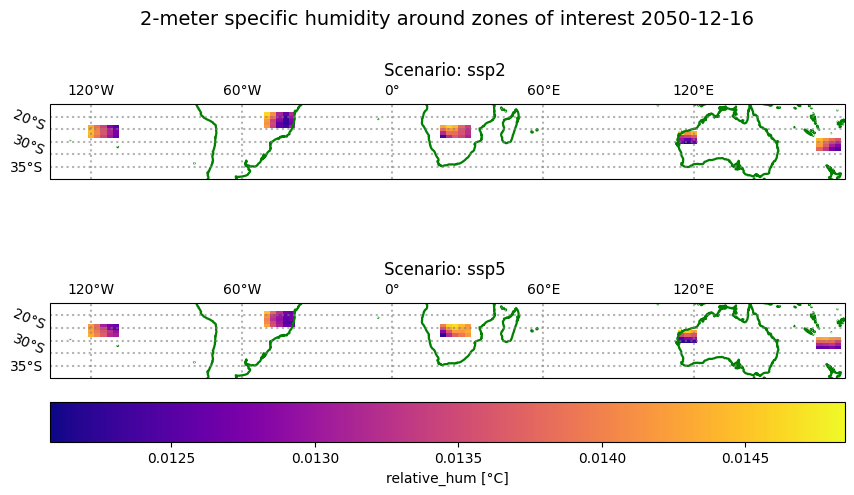

In [12]:
#Coordinates of the zones we want
#West Oceanie: 20°S,113°E ; 20°S, 119°E; 23°S, 113°E; 23°S, 119°N
#East America: 21°S,45°E; 21°S,50°E;  23°S, 50°E; 23°S, 45°E; 
#Central Africa: 18, 22; 18,28; 21,22; 21,28
#West Pacific:   20, 170; 20, 175; 23, 170; 23, 175
#East Pacific:   20, 113°W, 20, 120; 23, 113; 23,120

chosen_time = "12-2050"  #Enter a date. Format = '%m-%Y'"
##chosen_time_index = (chosen_time[1] - 2015)*12 + chosen_time[0] - 1
chosen_time_index = (int(chosen_time.split('-')[1]) -2015)*12 + int(chosen_time.split('-')[0]) -1
zones_file = ['oceanie', 'southamerica', 'tropicsouthafrica', 'oceanie', 'tropicpacifics']
zones = ['australie', 'brazil', 'centralAfrica', 'oceanNewGuinea', 'oceanChili']
min_lat = [-26, -20, -23, -28, -23]
max_lat = [-21, -13, -18, -23, -18]
min_lon = [113, -50, 20, 170, -120]
max_lon = [122, -38, 30, 180, -110]

fig, ax = plt.subplots(nrows= 2, ncols=1, subplot_kw={'projection': ccrs.PlateCarree()}, figsize = (8,5))

cmap = 'plasma'

fig.suptitle('2-meter specific humidity around zones of interest %s' % v100['time_array_oceanie_ssp2_100'][chosen_time_index].strftime('%Y-%m-%d'), fontsize=14)
fig.tight_layout(pad = 0.2, h_pad = 0.03)

# Before defining the region, we need to create a couple of 2-dimensional array, which contain the latitude and longitude values in a grid.
for j, mod in enumerate(model): 
    
    for i in range(len(zones_file)):

        lon_array = np.array(v['lon_array_%s_%s_1' % (zones_file[i], mod)])
        lat_array = np.array(v['lat_array_%s_%s_1' % (zones_file[i], mod)])
        time_array = np.array(v100['time_array_%s_%s_100' % (zones_file[i], mod)])
        rh2m_array = np.array(v100['rh2m_array_%s_%s_100' % (zones_file[i], mod)])
        q2m_array = np.array(v100['q2m_array_%s_%s_100' % (zones_file[i], mod)])
        tsol_ter_array = np.array(v100['tsol_ter_array_%s_%s_100' % (zones_file[i], mod)])
        
        lon_2d, lat_2d = np.meshgrid(lon_array, lat_array)
        #print('The size of the 2-dimensional latitude and longitude arrays are: ', lat_2d.shape, lon_2d.shape)

        # With the boundaries, we can now define a set of boolean conditions. These will be two 2-dimensional array, one for each region, having the values:
        # - "True" at the indices of the array that are within the region
        # - "False" for the ones outside.
        conditions_within_zones = np.logical_and(np.logical_and(lon_2d >= min_lon[i], lon_2d <= max_lon[i]),
                                                          np.logical_and(lat_2d >= min_lat[i], lat_2d <= max_lat[i])) 

        num_valid_lon_zones = np.sum(conditions_within_zones, axis = 1).max()
        num_valid_lat_zones = np.sum(conditions_within_zones, axis = 0).max()

        #print('\nNumber of valid latitudes in the island region: ', num_valid_lat_zones)
        #print('Number of valid longitudes in the island region: ', num_valid_lon_zones)

        rh2m_zones = np.full((time_array.shape[0], num_valid_lat_zones, num_valid_lon_zones), np.nan)
        q2m_zones = np.full((time_array.shape[0], num_valid_lat_zones, num_valid_lon_zones), np.nan)
        tsol_ter_zones = np.full((time_array.shape[0], num_valid_lat_zones, num_valid_lon_zones), np.nan)



        for index_time in range(time_array.shape[0]):
            rh2m_at_current_time = rh2m_array[index_time, :]
            rh2m_zones[index_time, :] = rh2m_at_current_time[conditions_within_zones].reshape(num_valid_lat_zones, num_valid_lon_zones)

            q2m_at_current_time = q2m_array[index_time, :]
            q2m_zones[index_time, :] = q2m_at_current_time[conditions_within_zones].reshape(num_valid_lat_zones, num_valid_lon_zones)
            
            tsol_ter_at_current_time = tsol_ter_array[index_time, :]
            tsol_ter_zones[index_time, :] = tsol_ter_at_current_time[conditions_within_zones].reshape(num_valid_lat_zones, num_valid_lon_zones)
            
        v100['rh2m_constrained_array_%s_%s_100' % (zones[i], mod)] = rh2m_zones
        v100['q2m_constrained_array_%s_%s_100' % (zones[i], mod)] = q2m_zones
        v100['tsol_ter_constrained_array_%s_%s_100' % (zones[i], mod)] = tsol_ter_zones

        # Let us visualize the regions that we extracted.
        # Since we have a 2-dimensional array at each time step, we have to select a specific time step for the plot.
        # Let's select the same one we used in the previous example, so we can compare the relative_hum value to make sure that we selected the correct regions.
        rh2m_zones_at_chosen_time = rh2m_zones[chosen_time_index, :, :]
        q2m_zones_at_chosen_time = q2m_zones[chosen_time_index, :, :]
        tsol_ter_zones_at_chosen_time = tsol_ter_zones[chosen_time_index, :, :]

        
        # We also need to define the lat and lon array for the two regions, so that we have the coordinates for the plot
        lon_2d_zones = lon_2d[conditions_within_zones].reshape(num_valid_lat_zones, num_valid_lon_zones)
        lat_2d_zones = lat_2d[conditions_within_zones].reshape(num_valid_lat_zones, num_valid_lon_zones)

        rh2m_min_in_plot = 0 
        rh2m_max_in_plot = 100 
        
        q2m_min_in_plot = q2m_zones_at_chosen_time.min()-0.0005
        q2m_max_in_plot = q2m_zones_at_chosen_time.max()+0.0005
        #mappable = ax[j].pcolormesh(lon_2d_zones, lat_2d_zones, rh2m_zones_at_chosen_time, cmap=cmap, vmin=rh2m_min_in_plot, vmax=rh2m_max_in_plot)
        mappable = ax[j].pcolormesh(lon_2d_zones, lat_2d_zones, q2m_zones_at_chosen_time, cmap=cmap, vmin=q2m_min_in_plot, vmax=q2m_max_in_plot)

    # Adding the same extra info as before
    ax[j].set_title('Scenario: %s '% mod)
    ax[j].coastlines(color='green', linewidth=1.6)
    ax[j].set(ylim=(-40 , -10))

    gl = ax[j].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle=':', linewidth=1.5, color='gray', alpha=0.6)
    gl.bottom_labels = False 
    gl.right_labels = False
plt.colorbar(mappable=mappable,   label='relative_hum [°C]', pad=0.1, orientation = 'horizontal',fraction = 0.4 )
pass 

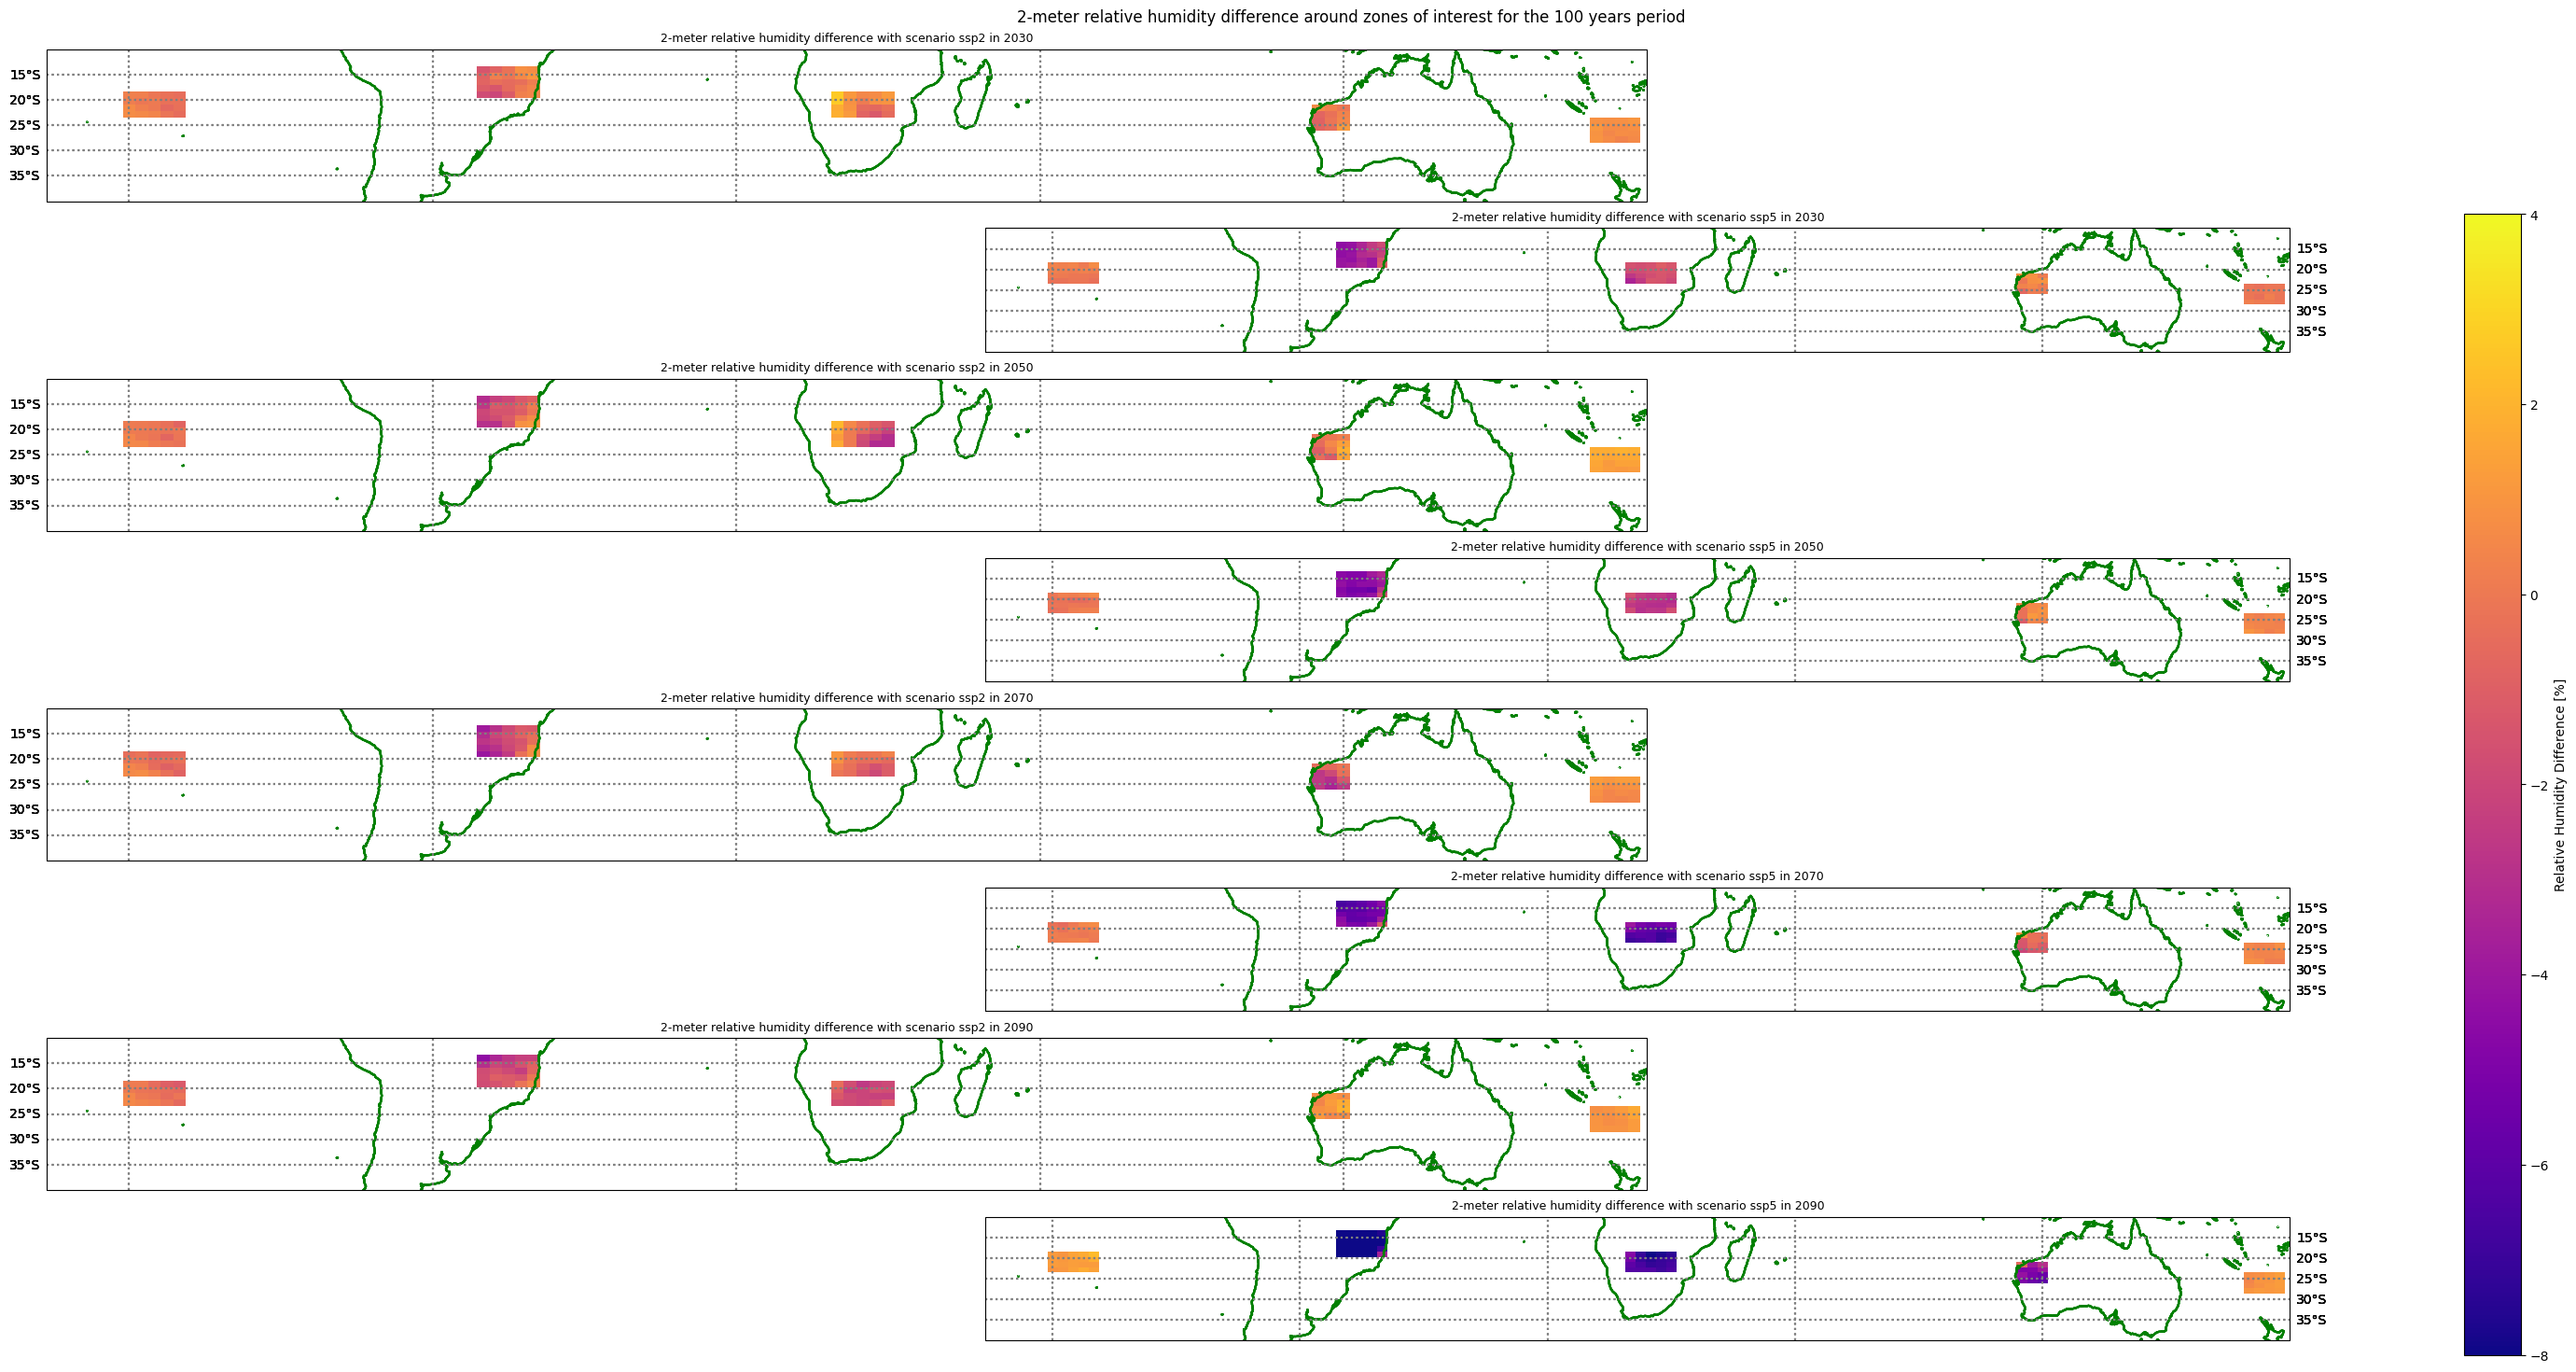

In [13]:
from matplotlib.figure import figaspect

dates = ["01-2030", "01-2050", "01-2070", "01-2090"]
fig, ax = plt.subplots(nrows= 2*len(dates), ncols=2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize = (30,15), gridspec_kw={'width_ratios': [0.2,0.2]})

cmap = 'plasma'

fig.suptitle('2-meter relative humidity difference around zones of interest for the 100 years period' )
fig.tight_layout(pad = 2, h_pad = 1)

position = -1
chosen_time_reference = "08-2015"
chosen_time_ref_index =  (int(chosen_time_reference.split('-')[1]) -2015)*12 + int(chosen_time_reference.split('-')[0]) -1


for k, dat in enumerate(dates):
    for j, mod in enumerate(model): 
        position += 1
        for i in range(len(zones_file)):
       
            chosen_time_index = (int(dat.split('-')[1]) -2015)*12 + int(dat.split('-')[0])-1              
            
            lon_array = np.array(v['lon_array_%s_%s_1' % (zones_file[i], mod)])
            lat_array = np.array(v['lat_array_%s_%s_1' % (zones_file[i], mod)])
            time_array = np.array(v100['time_array_%s_%s_100' % (zones_file[i], mod)])
            rh2m_array = np.array(v100['rh2m_array_%s_%s_100' % (zones_file[i], mod)])
            q2m_array = np.array(v100['q2m_array_%s_%s_100' % (zones_file[i], mod)])

            lon_2d, lat_2d = np.meshgrid(lon_array, lat_array)
      
            conditions_within_zones = np.logical_and(np.logical_and(lon_2d >= min_lon[i], lon_2d <= max_lon[i]),
                                                              np.logical_and(lat_2d >= min_lat[i], lat_2d <= max_lat[i])) 

            num_valid_lon_zones = np.sum(conditions_within_zones, axis = 1).max()
            num_valid_lat_zones = np.sum(conditions_within_zones, axis = 0).max()


            rh2m_zones = np.full((time_array.shape[0], num_valid_lat_zones, num_valid_lon_zones), np.nan)
            q2m_zones = np.full((time_array.shape[0], num_valid_lat_zones, num_valid_lon_zones), np.nan)


            for index_time in range(time_array.shape[0]):
                rh2m_at_current_time = rh2m_array[index_time, :]
                rh2m_zones[index_time, :] = rh2m_at_current_time[conditions_within_zones].reshape(num_valid_lat_zones, num_valid_lon_zones)

                q2m_at_current_time = q2m_array[index_time, :]
                q2m_zones[index_time, :] = q2m_at_current_time[conditions_within_zones].reshape(num_valid_lat_zones, num_valid_lon_zones)

            
            rh2m_zones_at_chosen_time = sum(rh2m_zones[chosen_time_index + i, :, :] for i in range(-30, 30))/60
            q2m_zones_at_chosen_time = sum(q2m_zones[chosen_time_index + i, :, :] for i in range(-30, 30))/60
            
            rh2m_zones_at_ref_time = sum(rh2m_zones[chosen_time_ref_index + i, :, :] for i in range(60))/60
                
            rh2m_zones_difference = rh2m_zones_at_chosen_time - rh2m_zones_at_ref_time


            # We also need to define the lat and lon array for the two regions, so that we have the coordinates for the plot
            lon_2d_zones = lon_2d[conditions_within_zones].reshape(num_valid_lat_zones, num_valid_lon_zones)
            lat_2d_zones = lat_2d[conditions_within_zones].reshape(num_valid_lat_zones, num_valid_lon_zones)

            rh2m_min_in_plot = -8
            rh2m_max_in_plot = 4 

            q2m_min_in_plot = q2m_zones_at_chosen_time.min()-0.0005
            q2m_max_in_plot = q2m_zones_at_chosen_time.max()+0.0005
            #mappable = ax[j].pcolormesh(lon_2d_zones, lat_2d_zones, rh2m_zones_at_chosen_time, cmap=cmap, vmin=rh2m_min_in_plot, vmax=rh2m_max_in_plot)
            mappable = ax[position][j].pcolormesh(lon_2d_zones, lat_2d_zones, rh2m_zones_difference, cmap=cmap, vmin=rh2m_min_in_plot, vmax=rh2m_max_in_plot)    
            ax[position][j].coastlines(color='green', linewidth=1.6)
            ax[position][j].set(ylim=(-40 , -10))
            ax[position][j].set_title('2-meter specific humidity around zones of interest %s' % v100['time_array_oceanie_ssp2_100'][chosen_time_index].strftime('%Y-%m-%d'), fontsize=7)

            gl = ax[position][j].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle=':', linewidth=1.5, color='gray', alpha=0.6)
           
            gl.top_labels = False
            if j == 0:
                ax[position][j].set_title('2-meter relative humidity difference with scenario ssp2 in %s' % v100['time_array_oceanie_ssp2_100'][chosen_time_index].strftime('%Y'), fontsize=9)
                gl.bottom_labels = False 
                gl.right_labels = False
            elif j == 0 & position == 0:
                gl.top_labels = True
            else: 
                ax[position][j].set_title('2-meter relative humidity difference with scenario ssp5 in %s' % v100['time_array_oceanie_ssp2_100'][chosen_time_index].strftime('%Y'), fontsize=9)
                gl.bottom_labels = False 
                gl.left_labels = False
            
                
#plt.figtext(0.1', ha='center', va='center')               
plt.colorbar(mappable=mappable,   label='Relative Humidity Difference [%]', pad=0.1, orientation = 'vertical', ax = ax[1:8,1])
for i in range(2*len(dates)):
    j = i % 2 -1 
    fig.delaxes(ax[i][j])  
pass 

plt.savefig('labiteahogge.png')

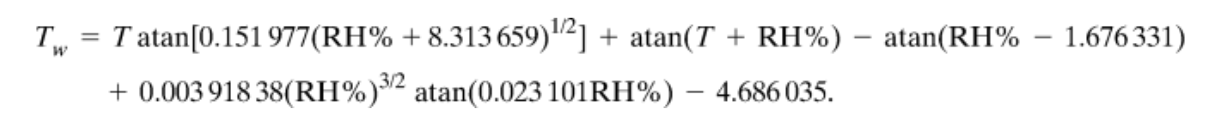

In [14]:
#Température humide
def temperature_humide(humidity, dry_temp):
    #tw = 0.281*pow(humidity, 0.2735)* dry_temp + 0.0003018*pow(humidity, 2) + 0.01289 * humidity - 4.0962
    tw = dry_temp*[np.arctan(0.151977*(pow(humidity + 8.313659, 1/2)))] + np.arctan(dry_temp + humidity) - np.arctan(humidity - 1.676331) + 0.00391838*pow(humidity, 3/2)*np.arctan(0.023101*humidity)- 4.686035
    return tw[0,:]

for mod in model:
    for zone in zones:
        v100['temphum_contrained_array_%s_%s_100' % (zone, mod)] = temperature_humide(v100['rh2m_constrained_array_%s_%s_100' % (zone, mod)], v100['tsol_ter_constrained_array_%s_%s_100'% (zone, mod)]-273.3)
        print(v100['temphum_contrained_array_%s_%s_100' % (zone, mod)].shape)

(1032, 4, 3)
(1032, 5, 5)
(1032, 4, 5)
(1032, 4, 4)
(1032, 4, 5)
(960, 4, 3)
(960, 5, 5)
(960, 4, 5)
(960, 4, 4)
(960, 4, 5)


In [15]:
import math
index_val = [11*i + x for i in range(1,10) for x in range(4)]
index_val_end = np.array([960]*len(index_val))- np.array(index_val)
index_val_end = list(index_val_end)
for mod in model:
    for zone in zones:
        print(zone, mod)
        print("Temp. Humide Max: %.2f" %np.max(v100['temphum_contrained_array_%s_%s_100' % (zone, mod)]))
        limite = v100['temphum_contrained_array_%s_%s_100' % (zone, mod)][v100['temphum_contrained_array_%s_%s_100' % (zone, mod)] > 35]
        limite_index = np.where([v100['temphum_contrained_array_%s_%s_100' % (zone, mod)] > 35])
        time = []
        if limite.shape[0] > 0:
            for ind in limite_index[1]:
                time.append((2015 + math.floor(ind/ 12), ind%12+1))
            print("Date at which wet belb temperature becomes lethal for population:", len(set(time)))
            print("First occurrence of a wet bulb temperature above 35: ",time[0])
        avg_2015 = np.mean([v100['temphum_contrained_array_%s_%s_100' % (zone, mod)][0:120,:][val] for val in index_val])
        avg_fin = np.mean([v100['temphum_contrained_array_%s_%s_100' % (zone, mod)][960-120:960,:][val] for val in index_val])
        print("2015 average: ", avg_2015)
        print("End average: ", avg_fin)
        shape = np.unravel_index(np.argmax(v100['temphum_contrained_array_%s_%s_100' % (zone, mod)]),(v100['temphum_contrained_array_%s_%s_100' % (zone, mod)].shape[0],v100['temphum_contrained_array_%s_%s_100' % (zone, mod)].shape[1],v100['temphum_contrained_array_%s_%s_100' % (zone, mod)].shape[2]))
       
        print("Maximume wet bulb temp: %d-%d" % (2015 + math.floor(shape[0]/ 12), shape[0]%12+1))
        print("\n")   

australie ssp2
Temp. Humide Max: 36.40
Date at which wet belb temperature becomes lethal for population: 13
First occurrence of a wet bulb temperature above 35:  (2069, 1)
2015 average:  18.441434169367668
End average:  20.29015765932973
Maximume wet bulb temp: 2098-1


brazil ssp2
Temp. Humide Max: 29.59
2015 average:  20.227144143003734
End average:  22.15617342478409
Maximume wet bulb temp: 2085-2


centralAfrica ssp2
Temp. Humide Max: 26.95
2015 average:  16.199164730123478
End average:  18.278103057823426
Maximume wet bulb temp: 2084-12


oceanNewGuinea ssp2
Temp. Humide Max: 20.33
2015 average:  17.164194190915097
End average:  17.268291766792156
Maximume wet bulb temp: 2098-1


oceanChili ssp2
Temp. Humide Max: 22.53
2015 average:  20.22913710702646
End average:  20.250057483881108
Maximume wet bulb temp: 2031-10


australie ssp5
Temp. Humide Max: 39.06
Date at which wet belb temperature becomes lethal for population: 46
First occurrence of a wet bulb temperature above 35:  (204

In [16]:
import math
for mod in model:
    for zone in zones:
        print(zone, mod)
        print("Temp. Humide Max: %.2f" %np.max(v100['temphum_contrained_array_%s_%s_100' % (zone, mod)]))
        limite = v100['temphum_contrained_array_%s_%s_100' % (zone, mod)][v100['temphum_contrained_array_%s_%s_100' % (zone, mod)] > 27]
        limite_index = np.where([v100['temphum_contrained_array_%s_%s_100' % (zone, mod)] > 27])
        time = []
        if limite.shape[0] > 0:
            for ind in limite_index[1]:
                time.append((2015 + math.floor(ind/ 12), ind%12+1))
            print("Date at which wet belb temperature becomes lethal for population:", len(set(time)))
            print("First occurrence of a wet bulb temperature above 27: ",time[0])
        avg_2015 = np.mean([v100['temphum_contrained_array_%s_%s_100' % (zone, mod)][0:120,:][val] for val in index_val])
        avg_fin = np.mean([v100['temphum_contrained_array_%s_%s_100' % (zone, mod)][960-120:960,:][val] for val in index_val])

        shape = np.unravel_index(np.argmax(v100['temphum_contrained_array_%s_%s_100' % (zone, mod)]),(v100['temphum_contrained_array_%s_%s_100' % (zone, mod)].shape[0],v100['temphum_contrained_array_%s_%s_100' % (zone, mod)].shape[1],v100['temphum_contrained_array_%s_%s_100' % (zone, mod)].shape[2]))
       
        print("Maximume wet bulb temp: %d-%d" % (2015 + math.floor(shape[0]/ 12), shape[0]%12+1))
        print("\n")   

australie ssp2
Temp. Humide Max: 36.40
Date at which wet belb temperature becomes lethal for population: 458
First occurrence of a wet bulb temperature above 27:  (2015, 1)
Maximume wet bulb temp: 2098-1


brazil ssp2
Temp. Humide Max: 29.59
Date at which wet belb temperature becomes lethal for population: 94
First occurrence of a wet bulb temperature above 27:  (2020, 1)
Maximume wet bulb temp: 2085-2


centralAfrica ssp2
Temp. Humide Max: 26.95
Maximume wet bulb temp: 2084-12


oceanNewGuinea ssp2
Temp. Humide Max: 20.33
Maximume wet bulb temp: 2098-1


oceanChili ssp2
Temp. Humide Max: 22.53
Maximume wet bulb temp: 2031-10


australie ssp5
Temp. Humide Max: 39.06
Date at which wet belb temperature becomes lethal for population: 453
First occurrence of a wet bulb temperature above 27:  (2015, 1)
Maximume wet bulb temp: 2092-2


brazil ssp5
Temp. Humide Max: 33.32
Date at which wet belb temperature becomes lethal for population: 227
First occurrence of a wet bulb temperature above 27:

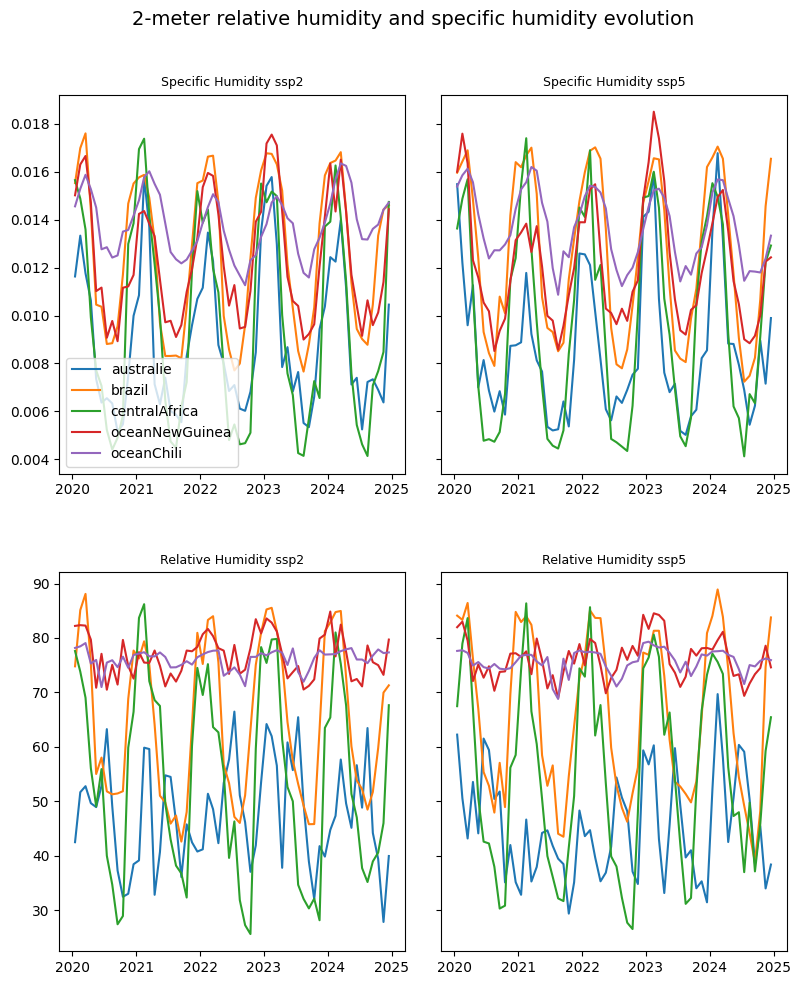

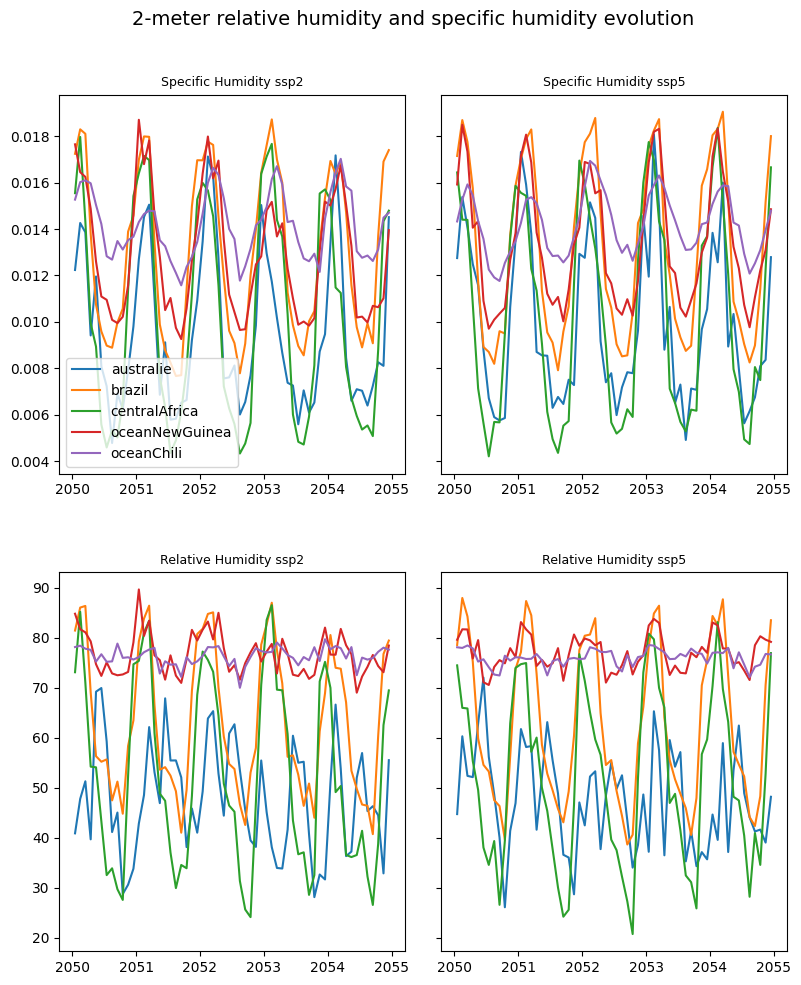

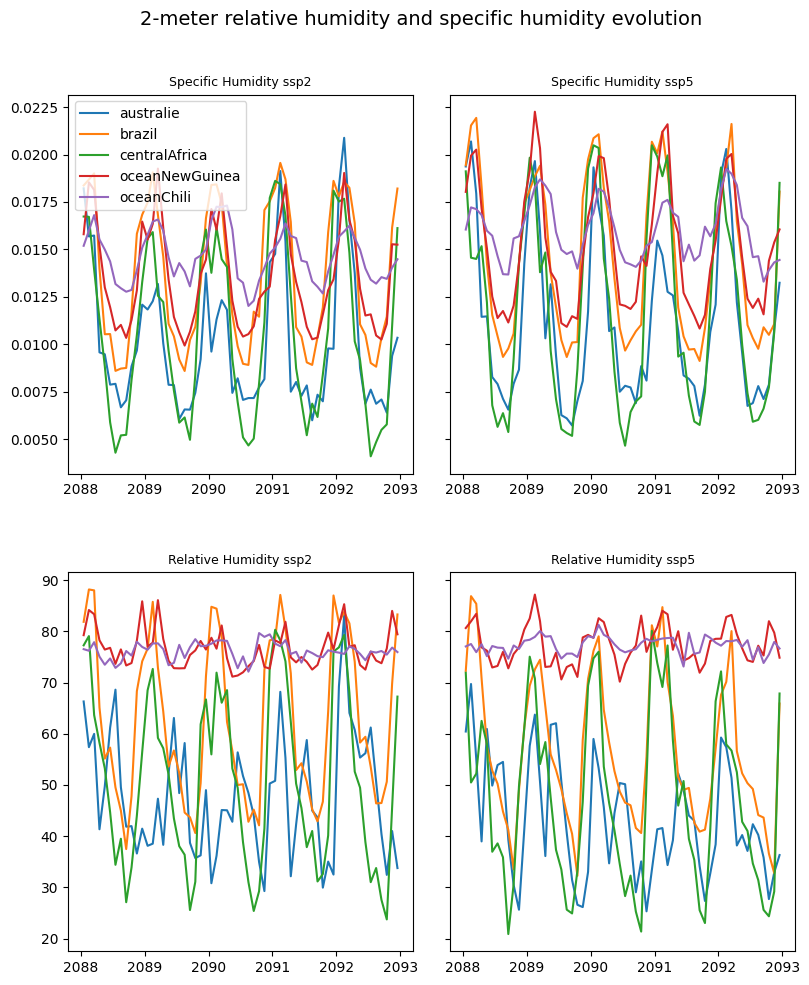

In [17]:
date = [2020,2050,2088]
for d,dat in enumerate(date):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (8,10), sharey = 'row')
    fig.suptitle('2-meter relative humidity and specific humidity evolution', fontsize=14)
    fig.tight_layout(rect = [0,0,1,.95], h_pad = 5)

    years_plot = 5
    for loc in zones:
        for j,mod in enumerate(model):
            q2m_means = [v100['q2m_constrained_array_%s_%s_100' % (loc, mod)].mean(axis = (1,2))[i] for i in range((dat-2015)*12,(dat-2015)*12+12*years_plot)]
            rh2m_means = [v100['rh2m_constrained_array_%s_%s_100' % (loc, mod)].mean(axis = (1,2))[i] for i in range((dat-2015)*12,(dat-2015)*12+12*years_plot)]
            ax[0,j].plot(v100['time_array_tropicpacifics_%s_100' % mod][(dat-2015)*12:(dat-2015)*12+12*years_plot], q2m_means, label = '%s' % loc)
            ax[1,j].plot(v100['time_array_tropicpacifics_%s_100' % mod][(dat-2015)*12:(dat-2015)*12+12*years_plot], rh2m_means, label = '%s' % loc)
            ax[0,j].set_title('Specific Humidity %s' % mod, fontsize = 9)
            ax[1,j].set_title('Relative Humidity %s' % mod, fontsize = 9)
            if j == 0:
                ax[0,j].legend()
            #plt.savefig('h_above_weak_layer.png')

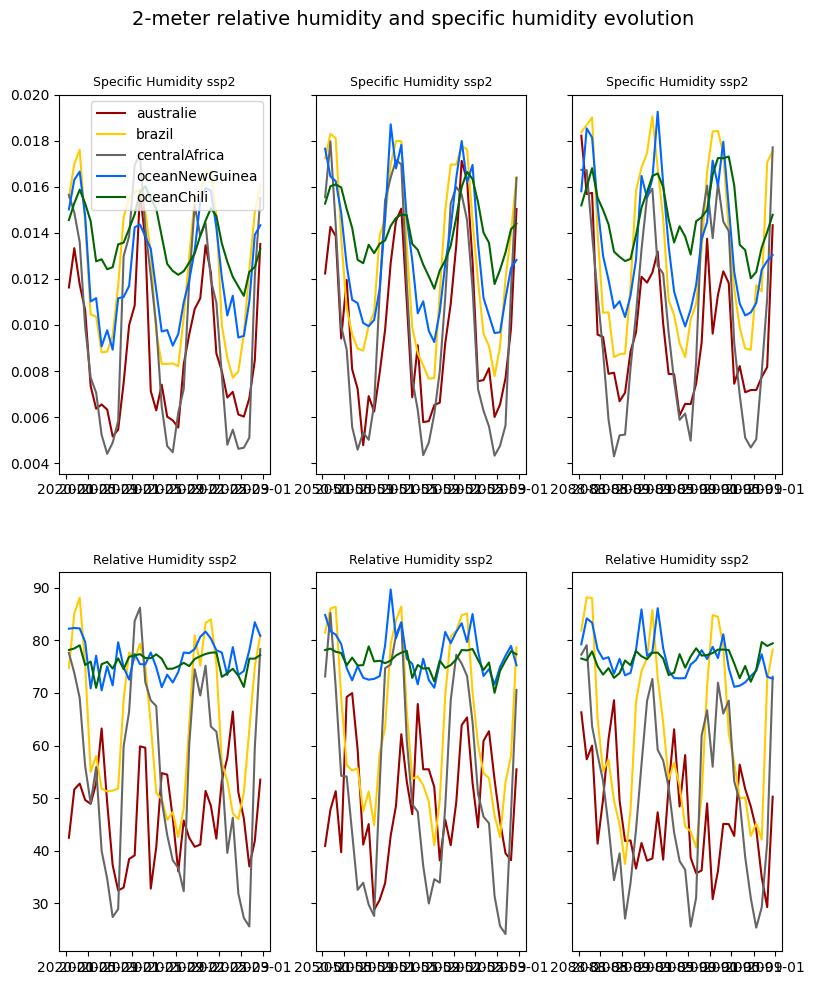

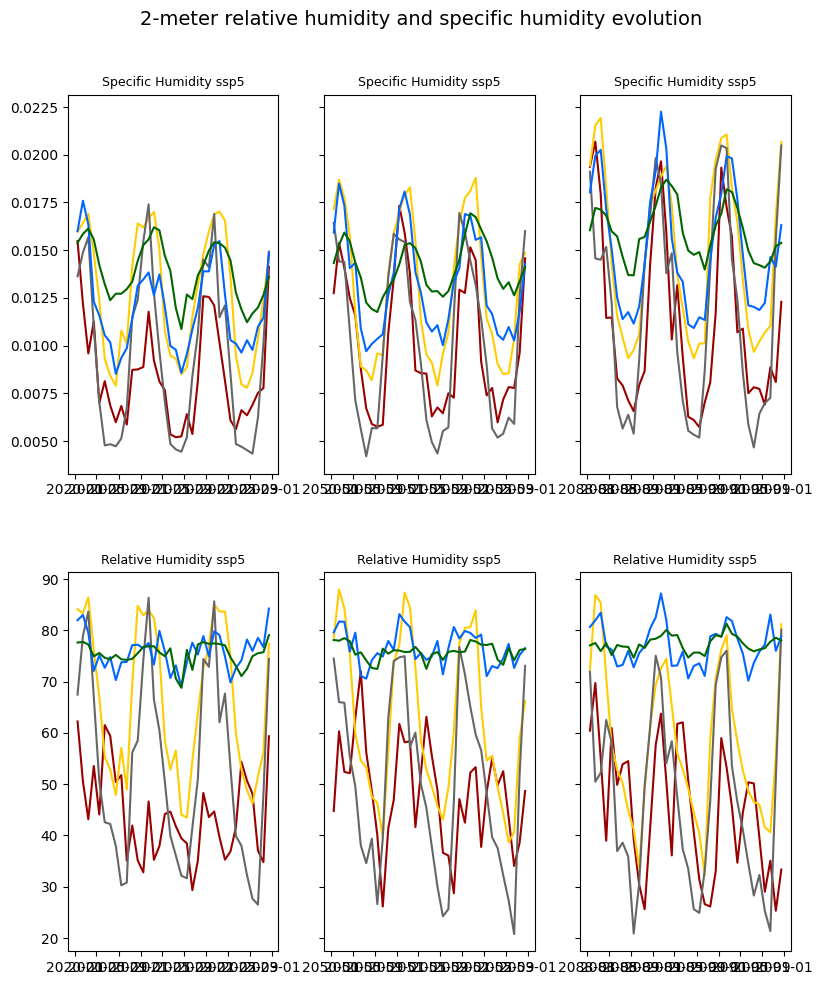

In [18]:
colors_graph = ['#990000','#ffcc00','#666666','#0066ff','#006600']
years_plot = 3
for j,mod in enumerate(model):
    fig, ax = plt.subplots(nrows=2, ncols=3, figsize = (8,10), sharey = 'row')
    fig.suptitle('2-meter relative humidity and specific humidity evolution', fontsize=14)
    fig.tight_layout(rect = [0,0,1,.95], h_pad = 5)
    for l, loc in enumerate(zones):
        for d,dat in enumerate(date):
            q2m_means = [v100['q2m_constrained_array_%s_%s_100' % (loc, mod)].mean(axis = (1,2))[i] for i in range((dat-2015)*12,(dat-2015)*12+12*years_plot)]
            rh2m_means = [v100['rh2m_constrained_array_%s_%s_100' % (loc, mod)].mean(axis = (1,2))[i] for i in range((dat-2015)*12,(dat-2015)*12+12*years_plot)]
            ax[0,d].plot(v100['time_array_tropicpacifics_%s_100' % mod][(dat-2015)*12:(dat-2015)*12+12*years_plot], q2m_means, label = '%s' % loc,color = colors_graph[l])
            ax[1,d].plot(v100['time_array_tropicpacifics_%s_100' % mod][(dat-2015)*12:(dat-2015)*12+12*years_plot], rh2m_means, label = '%s' % loc,color = colors_graph[l])
            ax[0,d].set_title('Specific Humidity %s' % mod, fontsize = 9)
            ax[1,d].set_title('Relative Humidity %s' % mod, fontsize = 9)
            date_format_xaxis = mdates.DateFormatter('%Y')
            #ax.xaxis.set_major_formatter(date_format_xaxis)
        if j == 0:
            ax[0,j].legend()
        #plt.savefig('h_above_weak_layer.png')

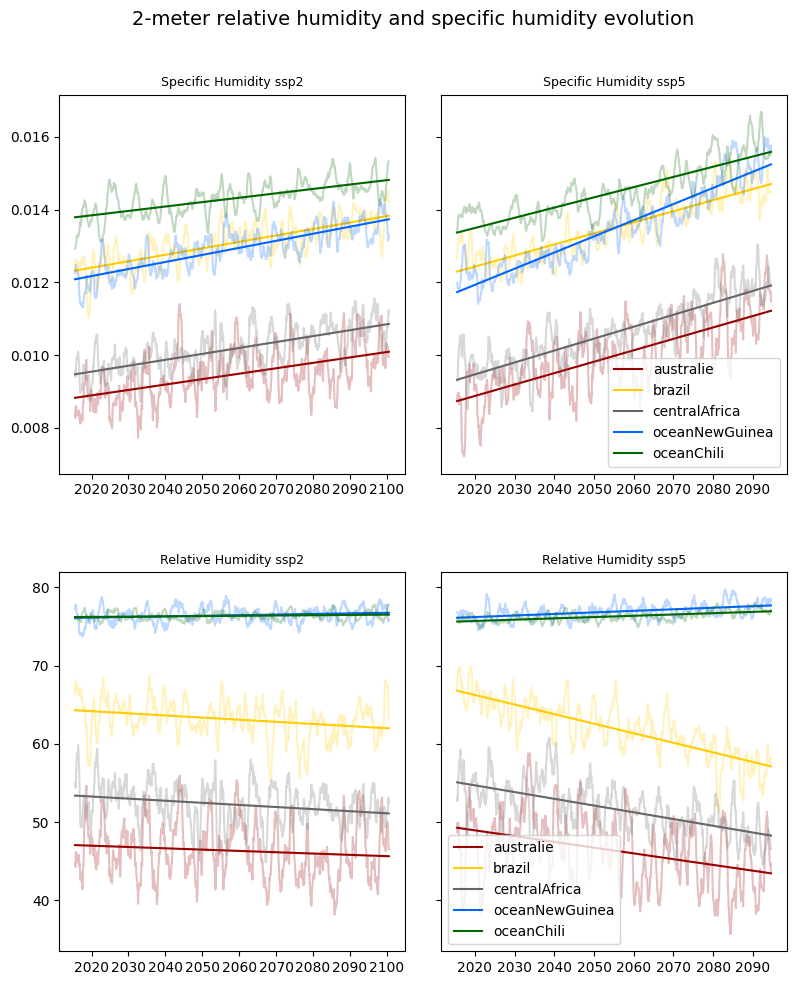

In [19]:
#------------ GRAPHS MATTHIEU ------------#

fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (8,10), sharey = 'row')
fig.suptitle('2-meter relative humidity and specific humidity evolution', fontsize=14)
fig.tight_layout(rect = [0,0,1,.95], h_pad = 5)

colors_graph = ['#990000','#ffcc00','#666666','#0066ff','#006600']

for i,loc in enumerate(zones):
    for j,mod in enumerate(model):
        q2m_means = [sum(v100['q2m_constrained_array_%s_%s_100' % (loc, mod)].mean(axis = (1,2))[i - 6:i + 6]) / 12 for i in range(6, len(v100['time_array_%s_%s_100' % (zones_file[i], mod)]) - 5)]
        rh2m_means = [sum(v100['rh2m_constrained_array_%s_%s_100' % (loc, mod)].mean(axis = (1,2))[i - 6:i + 6]) / 12 for i in range(6, len(v100['time_array_%s_%s_100' % (zones_file[i], mod)]) - 5)]
        X_q = v100['time_array_%s_%s_100' % (zones_file[i], mod)][6:len(v100['time_array_%s_%s_100' % (zones_file[i], mod)]) - 5]
        X_rh = v100['time_array_%s_%s_100' % (zones_file[i], mod)][6:len(v100['time_array_%s_%s_100' % (zones_file[i], mod)]) - 5]
        ax[0,j].plot(X_q, q2m_means, alpha = 0.25, color = colors_graph[i])
        ax[1,j].plot(X_rh, rh2m_means, alpha = 0.25, color = colors_graph[i])
        fit_q = np.polyfit([i for i in range(len(X_q))], q2m_means, 1)
        fit_rh = np.polyfit([i for i in range(len(X_rh))], rh2m_means, 1)
        poly_q = np.poly1d(fit_q)
        poly_rh = np.poly1d(fit_rh)
        ax[0,j].plot(X_q, poly_q([i for i in range(len(X_q))]), label = '%s' % loc, color = colors_graph[i])
        ax[1,j].plot(X_rh, poly_rh([i for i in range(len(X_rh))]), label = '%s' % loc, color = colors_graph[i])
        ax[0,j].set_title('Specific Humidity %s' % mod, fontsize = 9)
        ax[1,j].set_title('Relative Humidity %s' % mod, fontsize = 9)
        if j == 1:
            ax[0,j].legend()
            ax[1,j].legend()